<div style="text-align: left;background-color:#053C71; font-family: Trebuchet MS; color:white; padding: 12px; line-height: 1.25; border-radius: 100px; margin-bottom: 0em; text-align: center; font-size: 58px; border-style: solid; border-width: 8px; animation: blinkBorder 2s infinite, fadeIn 2s ease, slideInFromLeft 1.5s ease;">
    Lockheed Martin Analysis and Predictions
</div>

<style>
    @keyframes slideInFromLeft {
        0% {
            transform: translateX(-100%);
            opacity: 0;
        }
        100% {
            transform: translateX(0);
            opacity: 1;
        }
    }

    @keyframes blinkBorder {
        0% {
            border-color: White
            ;
        }
        50% {
            border-color: #FFFFFF;
        }
        100% {
            border-color: #FFFFFF;
        }
    }

    @keyframes fadeIn {
        0% {
            color: #F0EDEE;
        }
        25% {
            color: #AAB7B8;
        }
        50% {
            color: #C9D4D8;
        }
        100% {
            color: #F0EDEE;
        }
    }
</style>


<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<style>
  blockquote {
    background-color: #f9f9f9;
    border-left: 10px solid #DEF5B9;
    margin: 1.5em 0;
    padding: 0.5em 1em;
  }
</style>
</head>
<body>

<blockquote>
</blockquote>

</body>
</html>

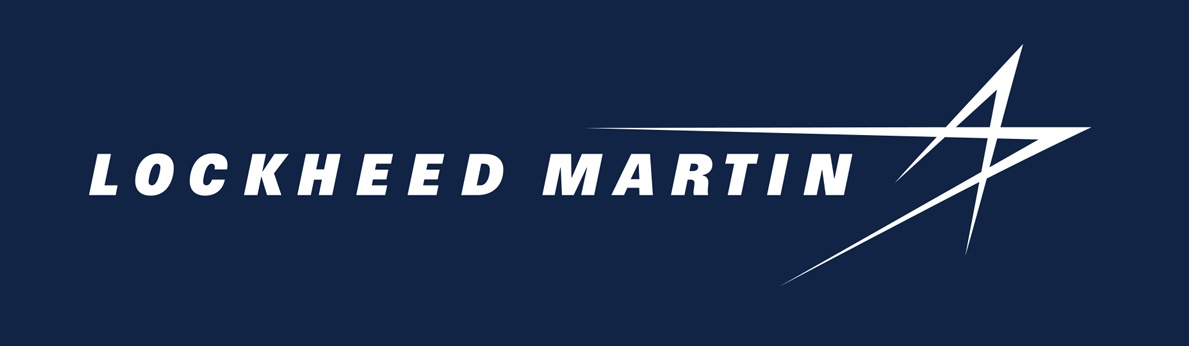

 > ## <span style="color:darkblue"><b>|</b></span><span style="color:blue"> <b>Introduction </b></span><span style="color:darkblue"><b>|</b></span> - `In this notebook we will analyze the Lockheed Martin stocks. Let's dive into analyzing stock prices and making predictions. We'll examine their current market position and determine if investing in their stocks is a wise choice. Ready to begin?`

 > ## <span style="color:darkblue"><b>|</b></span><span style="color:blue"> <b>About Dataset </b></span><span style="color:darkblue"><b>|</b> </span>- `The dataset contain over 6118 OHLC values on Lockheed Martin stocks from 01/01/2000 to 4/27/2024.`
 </span>  `Date - The date 
 Open - The opening value
 High - The highest value
 Low - The lowest value
 Close - The closing value
 Adj Close - The adjusted closing value
 Volume - The trading volume of the stocks`

### <h3 style="background-color:DARKBLUE;color:white;text-align: center;padding-top: 10px;padding-bottom: 10px;border-radius: 20px 100px;"><strong><centre>Setup </centre></strong></h3>

<span style="font-size: larger;"> `Let's setup the notebook. Let's import all the needed libraries and load the data.` </span>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.graph_objects as go
import plotly.express as px 
from plotly.subplots import make_subplots
print("Setup Complete")

Setup Complete


In [2]:
data = pd.read_csv('/kaggle/input/lockheed-martin-stocks/LMT.csv')

data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,22.00,22.3125,20.2500,20.2500,10.977419,3011300
1,2000-01-04,20.00,21.3125,20.0000,20.9375,11.350107,3593500
2,2000-01-05,21.25,21.6250,20.5000,21.0625,11.417871,1721200
3,2000-01-06,21.00,21.7500,21.0000,21.3750,11.587275,1750700
4,2000-01-07,21.75,22.0625,21.1875,21.4375,11.621161,2203200


### <h3 style="background-color:DARKBLUE;color:white;text-align: center;padding-top: 10px;padding-bottom: 10px;border-radius: 20px 100px;"><strong><centre>Simple Analysis </centre></strong></h3>

<span style="font-size: larger;"> `Now, let's examine the details of the dataset, such as the shape and columns.` </span>

In [3]:
print("Simple Analysis")
print("---------------")
print("Shape")
print(data.shape)
print("---------------")
print("Columns")
print(data.columns)
print("---------------")
print("Types of Columns")
print(data.dtypes)

Simple Analysis
---------------
Shape
(6118, 7)
---------------
Columns
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
---------------
Types of Columns
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


### <h3 style="background-color:DARKBLUE;color:white;text-align: center;padding-top: 10px;padding-bottom: 10px;border-radius: 20px 100px;"><strong><centre>Exploratory Data Analysis </centre></strong></h3>

<span style="font-size: larger;"> `Now, let's conduct an EDA on the data.` </span>

In [4]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['Date'], y=data['Open'], mode='lines+markers', name='Opening Prices', marker=dict(color='yellow')))
fig.add_trace(go.Scatter(x=data['Date'], y=data['Close'], mode='lines+markers', name='Closing Prices', marker=dict(color='tomato')))
fig.add_trace(go.Scatter(x=data['Date'], y=data['High'], mode='lines+markers', name='High Prices', marker=dict(color='orange')))
fig.add_trace(go.Scatter(x=data['Date'], y=data['Low'], mode='lines+markers', name='Low Prices', marker=dict(color='royalblue')))
fig.add_trace(go.Scatter(x=data['Date'], y=data['Adj Close'], mode='lines+markers', name='Adj Close', marker=dict(color='skyblue')))
fig.update_layout(title='OHLC Values of Lockheed Martin Stocks', xaxis_title='Date', yaxis_title='Price', 
                plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))
fig.show()

<span style="font-size: larger;"> `The graph shows a relatively small difference between the high and low prices. This sohws that the stocks are stable on the market that they are a positive choice for investment.` </span>

In [5]:
hovertext=[]
for i in range(len(data['Open'])):
    hovertext.append('Open: '+str(data['Open'][i])+'<br>Close: '+str(data['Close'][i]))
    
fig = go.Figure(data=go.Ohlc(x=data['Date'],
                    open=data['Open'],
                    high=data['High'],
                    low=data['Low'],
                    close=data['Close'],
                    text=hovertext,
                    hoverinfo='text',
                    increasing_line_color= 'royalblue', 
                    decreasing_line_color= 'white'))

fig.update_layout(title='OHLC Chart of Lockheed Martin Stocks',
                template = 'plotly_dark')
fig.show()

<span style="font-size: larger;"> `As you see, the OHLC chart shows a very small difference between the high and low values and increasing stock prices. Let's examine the difference between the high and low value further.` </span>

In [6]:
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

df['High_Low_Diff'] = data['High'] - data['Low']

# Create a line plot
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Date'], y=df['High_Low_Diff'], mode='lines', name='High-Low Difference'))

fig.update_layout(title='Stock Volatility (High-Low Difference)',
                xaxis_title='Date',
                yaxis_title='High-Low Difference',
                template='plotly_dark')

fig.show()

<span style="font-size: larger;"> `The largest volatility (difference between high and low value) was on March 2020 when it reached an astounding 43.19 points. The chart also shows that lately the volatility is increasing. This might show recent instability on the market. Let's continue our analysis to decide whether or not its a safe choice to invest in the stocks.` </span>

In [7]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = data['Date'], y = data['Volume'], mode = "lines+markers", name = "Volume", line = dict(color = 'blue')))
fig.update_layout(title='Trading Volume of Lockheed Martin Stocks', xaxis_title='Date', yaxis_title='Amount', 
                plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))
fig.show()

<span style="font-size: larger;"> `As you can see, the trading volume of the stocks has been falling more recently, suggesting a potential decrease in investor confidence or a lack of significant catalysts to drive trading activity. This is because at the beginning of 2024, Lockheed Martin gave out very weak year guidance, investors lost trust in the company. I personnally don't think that this will be for long. I will later on explain why. But for now, let's move on.` </span>

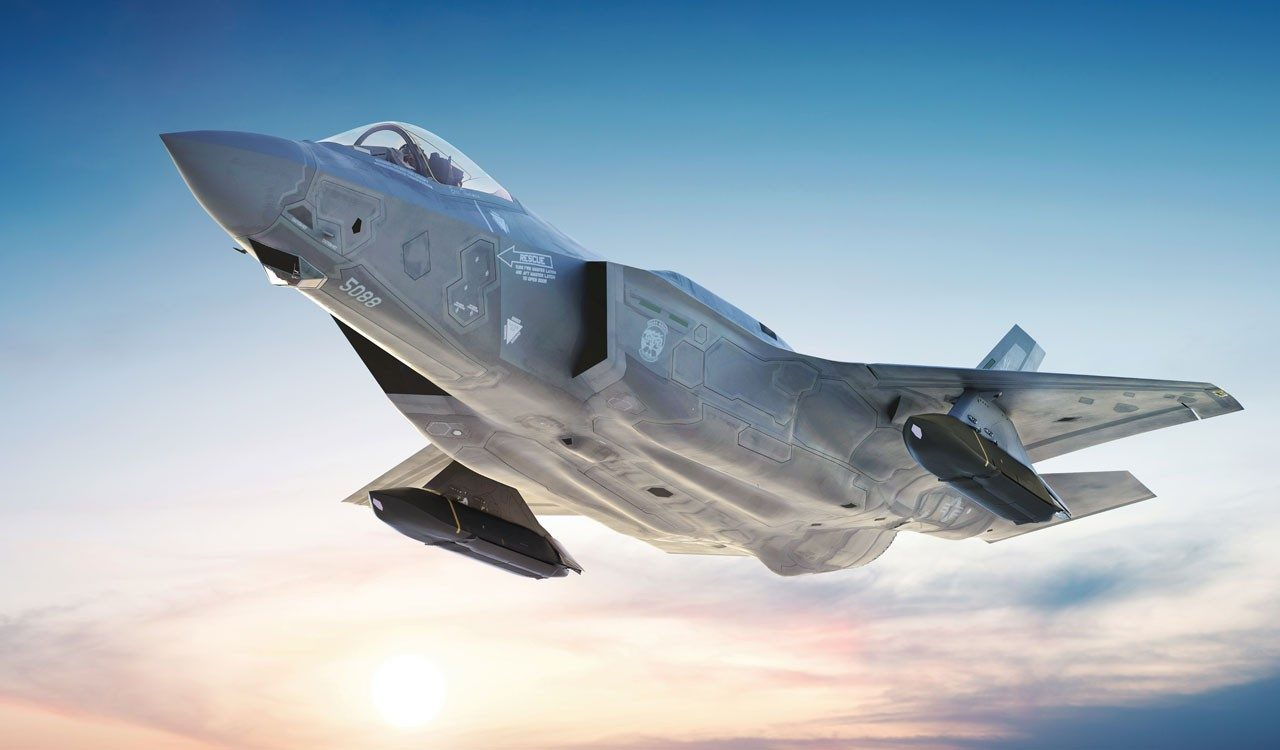

### <h3 style="background-color:DARKBLUE;color:white;text-align: center;padding-top: 10px;padding-bottom: 10px;border-radius: 20px 100px;"><strong><centre>Predicting Future Stock Prices </centre></strong></h3>

<span style="font-size: larger;">` Now, let's predict the future stock prices of Lockheed Martin and analyze how safe its a choice to invest.` </span>

<span style="font-size: larger;"> `Let's setup the notebook and download the yfinance module.` </span>

In [8]:
!pip install -q yfinance

In [9]:
from pandas_datareader.data import DataReader
import yfinance as yf
from keras.models import Sequential
from keras.layers import Dense, LSTM
from pandas_datareader import data as pdr
from sklearn.preprocessing import MinMaxScaler

yf.pdr_override()

# For time stamps
from datetime import datetime
print("Setup Complete")

2024-04-28 01:04:39.668265: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-28 01:04:39.668362: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-28 01:04:39.818607: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Setup Complete


<span style="font-size: larger;"> `Now, let's prepare the dataset for model training.` </span>

In [10]:
# Create a new dataframe with only the 'Close column 
data = data.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

5813

In [11]:
# Let's scale the dataset to the needed size
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00747754],
       [0.0088957 ],
       [0.00915354],
       ...,
       [0.91280673],
       [0.92444072],
       [0.91724167]])

In [12]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00747754, 0.0088957 , 0.00915354, 0.00979816, 0.00992708,
       0.00825108, 0.00683293, 0.00941139, 0.00850893, 0.00799323,
       0.00696185, 0.00838   , 0.00812216, 0.00902462, 0.00605939,
       0.00541477, 0.00709077, 0.00580154, 0.00464123, 0.00386769,
       0.00425446, 0.00425446, 0.00412554, 0.00515693, 0.00438339,
       0.00360985, 0.00360985, 0.00348092, 0.00180492, 0.00296523,
       0.00309416, 0.00232062, 0.00283631, 0.001676  , 0.00283631,
       0.00244954, 0.00193385, 0.00232062, 0.00180492, 0.001676  ,
       0.00219169, 0.00103139, 0.00077354, 0.00283631, 0.00141815,
       0.00206277, 0.00103139, 0.00038677, 0.00064462, 0.        ,
       0.00103139, 0.00296523, 0.00283631, 0.00235285, 0.00141815,
       0.00103139, 0.00090246, 0.00180492, 0.00244954, 0.00438339])]
[0.005414771451965131]

[array([0.00747754, 0.0088957 , 0.00915354, 0.00979816, 0.00992708,
       0.00825108, 0.00683293, 0.00941139, 0.00850893, 0.00799323,
       0.00696185, 0.00838   , 0.0

<span style="font-size: larger;"> `Finally, let's train the model on the data and make predictions.` </span>

In [13]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5753/5753 ━━━━━━━━━━━━━━━━━━━━ 36s 6ms/step - loss: 0.0011


In [14]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


12.026689810797746

<span style="font-size: larger;"> `And last but not least, let's visualize the predictions and make inferences on them.` </span>

In [15]:
train = data[:training_data_len].copy()
valid = data[training_data_len:].copy()
valid['Predictions'] = predictions

# Create traces
trace1 = go.Scatter(x=train.index, y=train['Close'], mode='lines', name='Train')
trace2 = go.Scatter(x=valid.index, y=valid['Close'], mode='lines', name='Val')
trace3 = go.Scatter(x=valid.index, y=valid['Predictions'], mode='lines', name='Predictions')

# Combine traces
fig = go.Figure([trace1, trace2, trace3])

# Update layout
fig.update_layout(
    title='Model Predictions',
    xaxis=dict(title='Date', tickfont=dict(size=14)),
    yaxis=dict(title='Close Price USD ($)', tickfont=dict(size=14)),
    legend=dict(x=0.02, y=0.98),
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white')
)

# Show plot
fig.show()

### <h3 style="background-color:DARKBLUE;color:white;text-align: center;padding-top: 10px;padding-bottom: 10px;border-radius: 20px 100px;"><strong><centre>Investing Analysis </centre></strong></h3>

<span style="font-size: larger;"> `As you can see, based on the predictions, the stock prices will most likely stay stabily above 400 points. As I said earlier, the trading volume will soon start increasing once again. This is because Lockheed Martin is the leading company in production of U.S. military aircraft such as the f-22 and f-35. If, theoretically, the company starts falling, the U.S. government, which wouldn't like to lose its best provider of military aircraft, would invest in the company, and help it make a return on the market, of course in return for new fighter jets. This is a monopoly between the U.S. government and Lockheed Martin. Investors have a large chance to take advantage of this and invest in the stocks and make a profit. This is because the company is under protection of the U.S. government, making it a stable platform for long-term investment and share-holding. So, I would say that its a safe choice to invest in the Lockheed stocks.` </span>

### <h3 style="background-color:DARKBLUE;color:white;text-align: center;padding-top: 10px;padding-bottom: 10px;border-radius: 20px 100px;"><strong><centre>Conclusion </centre></strong></h3>

<span style="font-size: larger;"> `Huge thanks go to Fares Sayah for his awesome tutorial on how to predict stock prices. If you liked this notebook and found it interesting, please upvote and feel free to fork!` </span>

### <h3 style="background-color:DARKBLUE;color:white;text-align: center;padding-top: 10px;padding-bottom: 10px;border-radius: 20px 100px;"><strong><centre>God Bless You </centre></strong></h3>